In [1]:
import os
from matplotlib import image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from binarization.binarization_functions import Binarizator
from binarization.evaluation_measure import Measure
from skimage.util import img_as_ubyte
from skimage.util import img_as_float32


<h1>Upload photos</h1>

In [2]:
path = "../Data/ue1"
photo_name = "F2s.png"
#get all the file in the directory
arr = os.listdir(path)

dir = [file for file in arr if os.path.isdir(os.path.join(path, file)) ]

img = {}
gt_img = {}

for i in range(0, len(dir)-1):
    img[i] = image.imread(os.path.join(path,dir[i], photo_name))
    gt_img[i] = image.imread(os.path.join(path,dir[i], f"{dir[i]}GT.png"))

I am focusing the example on the first image

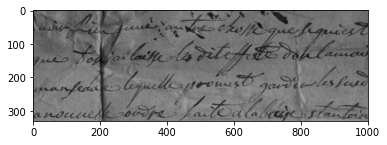

In [3]:
plt.imshow(img[0], cmap='gray')

<h2>Contrast Image Constructor</h2>

Suppress the background variation by using an image contrast

In [4]:
window = 3
bin = Binarizator(img[0], window, 0)

In [5]:
bin.contrast_image_constructor()
constrast_img = bin.get_contrast_image()
constrast_img

array([[ 9,  9, 15, ...,  5,  6,  6],
       [11, 11, 16, ...,  6,  6,  6],
       [23, 23, 16, ...,  6,  9,  9],
       ...,
       [ 3,  9,  8, ..., 12, 10,  7],
       [ 5,  8,  6, ...,  8,  8,  7],
       [ 2,  5,  5, ...,  8,  8,  5]], dtype=uint8)

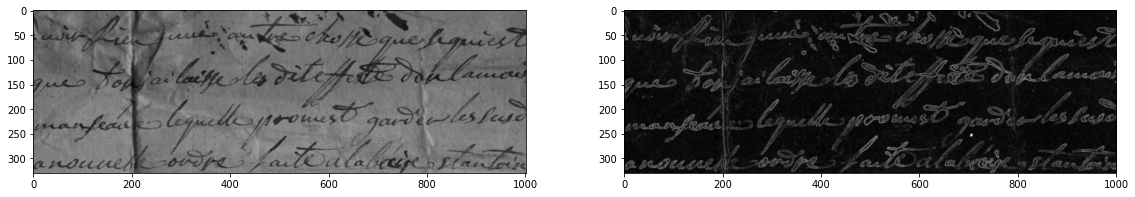

In [6]:
plt.figure(figsize=(30, 30))
ax = plt.subplot(3, 3, 1)
plt.imshow(img[0], cmap='gray')
ax = plt.subplot(3, 3, 2)
plt.imshow(constrast_img, cmap='gray')

<h2>High Constrast Pixel Detection</h2>

The purpose of this phase is to detect the high constrast image pixels lying around the text stroke boundary.

In [7]:
bin.high_contrast_image()
high_constrast_img = bin.get_high_contrast_img()
high_constrast_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

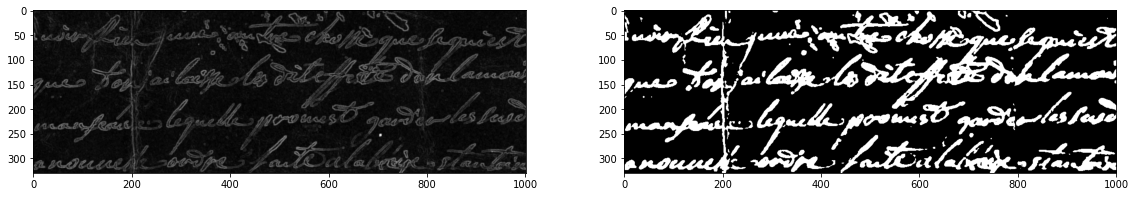

In [8]:
plt.figure(figsize=(30, 30))
ax = plt.subplot(3, 3, 1)
plt.imshow(constrast_img, cmap='gray')
ax = plt.subplot(3, 3, 2)
plt.imshow(high_constrast_img, cmap='gray')

<h2>Historical Document Thresholding</h2>

Detect the pixels based on the document thresholding

In [9]:
bin.pixels_classification()
final_img = bin.get_final_image()
final_img

/mnt/1028D91228D8F7A4/universita/Magistrale/Document Analysis/Esercizi/ImageBinarization/binarization/binarization_functions.py:116: RuntimeWarning: divide by zero encountered in double_scalars
  e_mean = num / n_e


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

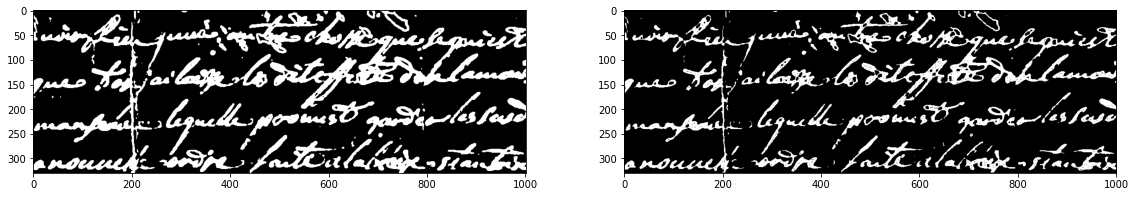

In [10]:
plt.figure(figsize=(30, 30))
ax = plt.subplot(3, 3, 1)
plt.imshow(high_constrast_img, cmap='gray')
ax = plt.subplot(3, 3, 2)
plt.imshow(final_img, cmap='gray')

<h1>Measures Test </h1>

I am comparing the GT image with the final image I got.

In [11]:
tmp = np.zeros(final_img.shape)
tmp[gt_img[0] != final_img] = 1
tmp.sum()


305220.0

In [12]:
height, width = final_img.shape
npixel = height*width
npixel

330330

In [13]:
gt_img[0]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [14]:
final_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

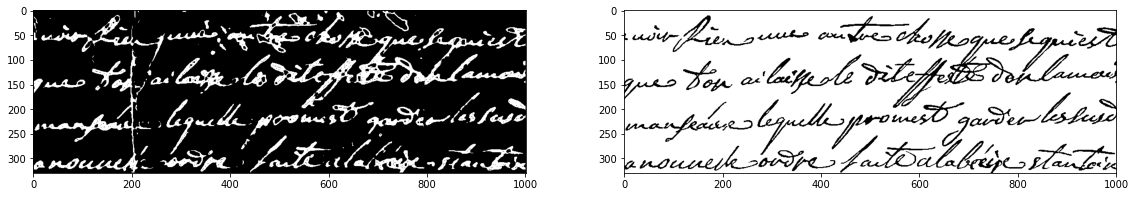

In [15]:
plt.figure(figsize=(30, 30))
ax = plt.subplot(3, 3, 1)
plt.imshow(final_img, cmap='gray')
ax = plt.subplot(3, 3, 2)
plt.imshow(gt_img[0], cmap='gray')

In [16]:
output = final_img
m = Measure(output, gt_img[0])
m.f_measure()
m.getFmeasure()

0.047021356313225925

In [17]:
m.psnr()
m.getPSNR()

0.7905932673088069

In [18]:
m.drd()
m.getDRD()

6.775049240301431e-05

In [19]:
im = final_img
im_gt = gt_img[0]
height, width = im.shape
npixel = height*width

tp = np.zeros(im_gt.shape)
tp[(im==0) & (im_gt==0)] = 1
numtp = tp.sum()

tn = np.zeros(im_gt.shape)
tn[(im==1) & (im_gt==1)] = 1
numtn = tn.sum()

fp = np.zeros(im_gt.shape)
fp[(im==0) & (im_gt==1)] = 1
numfp = fp.sum()

fn = np.zeros(im_gt.shape)
fn[(im==1) & (im_gt==0)] = 1
numfn = fn.sum()

#precision = numtp / (numtp + numfp)
#recall = numtp / (numtp + numfn)
#fmeasure = (2*recall*precision)/(recall+precision)

mse = (numfp+numfn)/npixel
psnr = 10.*np.log10(1./mse)
psnr
print(f"TP : {numtp, numtn, numfp, numfn }")

TP : (7530.0, 17580.0, 271634.0, 33586.0)
